# Scientific Python Bootcamp Day 3

Prepared and presented by John Russell and Ian Hunt-Isaak

This notebook is available on [Github]()

### Outline for the Day
- Making beautiful plots for presentations
- Crash course in covariance
- Application: financial time series data
- Time for questions, help, and other applications

### Making Beautiful Plots

It is one thing to make a plot for yourself, e.g. to make sure a function does what you want to do some preliminary data visualization. But when the time comes to turn your plot in as part of an assignment or to present in slides, you need to make the plots clear and readable for your audience.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#import matplotlib as mpl



In [2]:
#generate some data to plot - use lorenz equations from yesterday

def lorenz(t, r, rho, sigma, beta):
    x,y,z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y-beta*z
    return np.array([dxdt, dydt, dzdt])

init_vals = np.array([1,1,1])
lorenz_sol = solve_ivp(lorenz, (0,100), init_vals, t_eval = np.linspace(0,100,50000), args=(28, 10, 8/3))

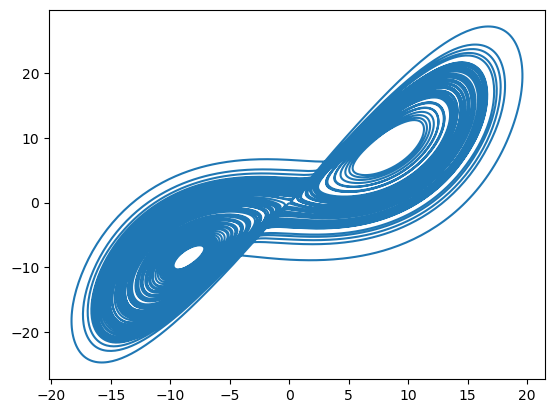

In [3]:
plt.style.use('default')
plt.plot(lorenz_sol.y[0], lorenz_sol.y[1])
plt.savefig("bad_plot1.png")
plt.show()

[Look at this plot in google slides](https://docs.google.com/presentation/d/1m_e95QT_hWmRM7InbBNS_zTQLK61z9B0MyIgTXlMY-k/edit#slide=id.g7ddea531b5_0_45)

### Whats wrong here?
- Background - bad for notebook but maybe good for white slides
- Line - too thick - cannot see all the features
- Size - relatively small
- Labels - title is uninformative, no labels (or legend though not relevant here)
- Font - too small for people to read

In [4]:
#These are some matplot lib configurations that I like to use. 
import matplotlib as mpl
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #Render the plots more nicely

#the below make plots look better if youre using the dark theme for jupyter
mpl.style.use('dark_background') #Use a dark background for matplotlib figures 
plt.rcParams.update({"figure.facecolor": "111111", #show figures here with a matching background
                     "savefig.facecolor": "212121"}) #save figures with the color of google slides "Simple Dark" Theme

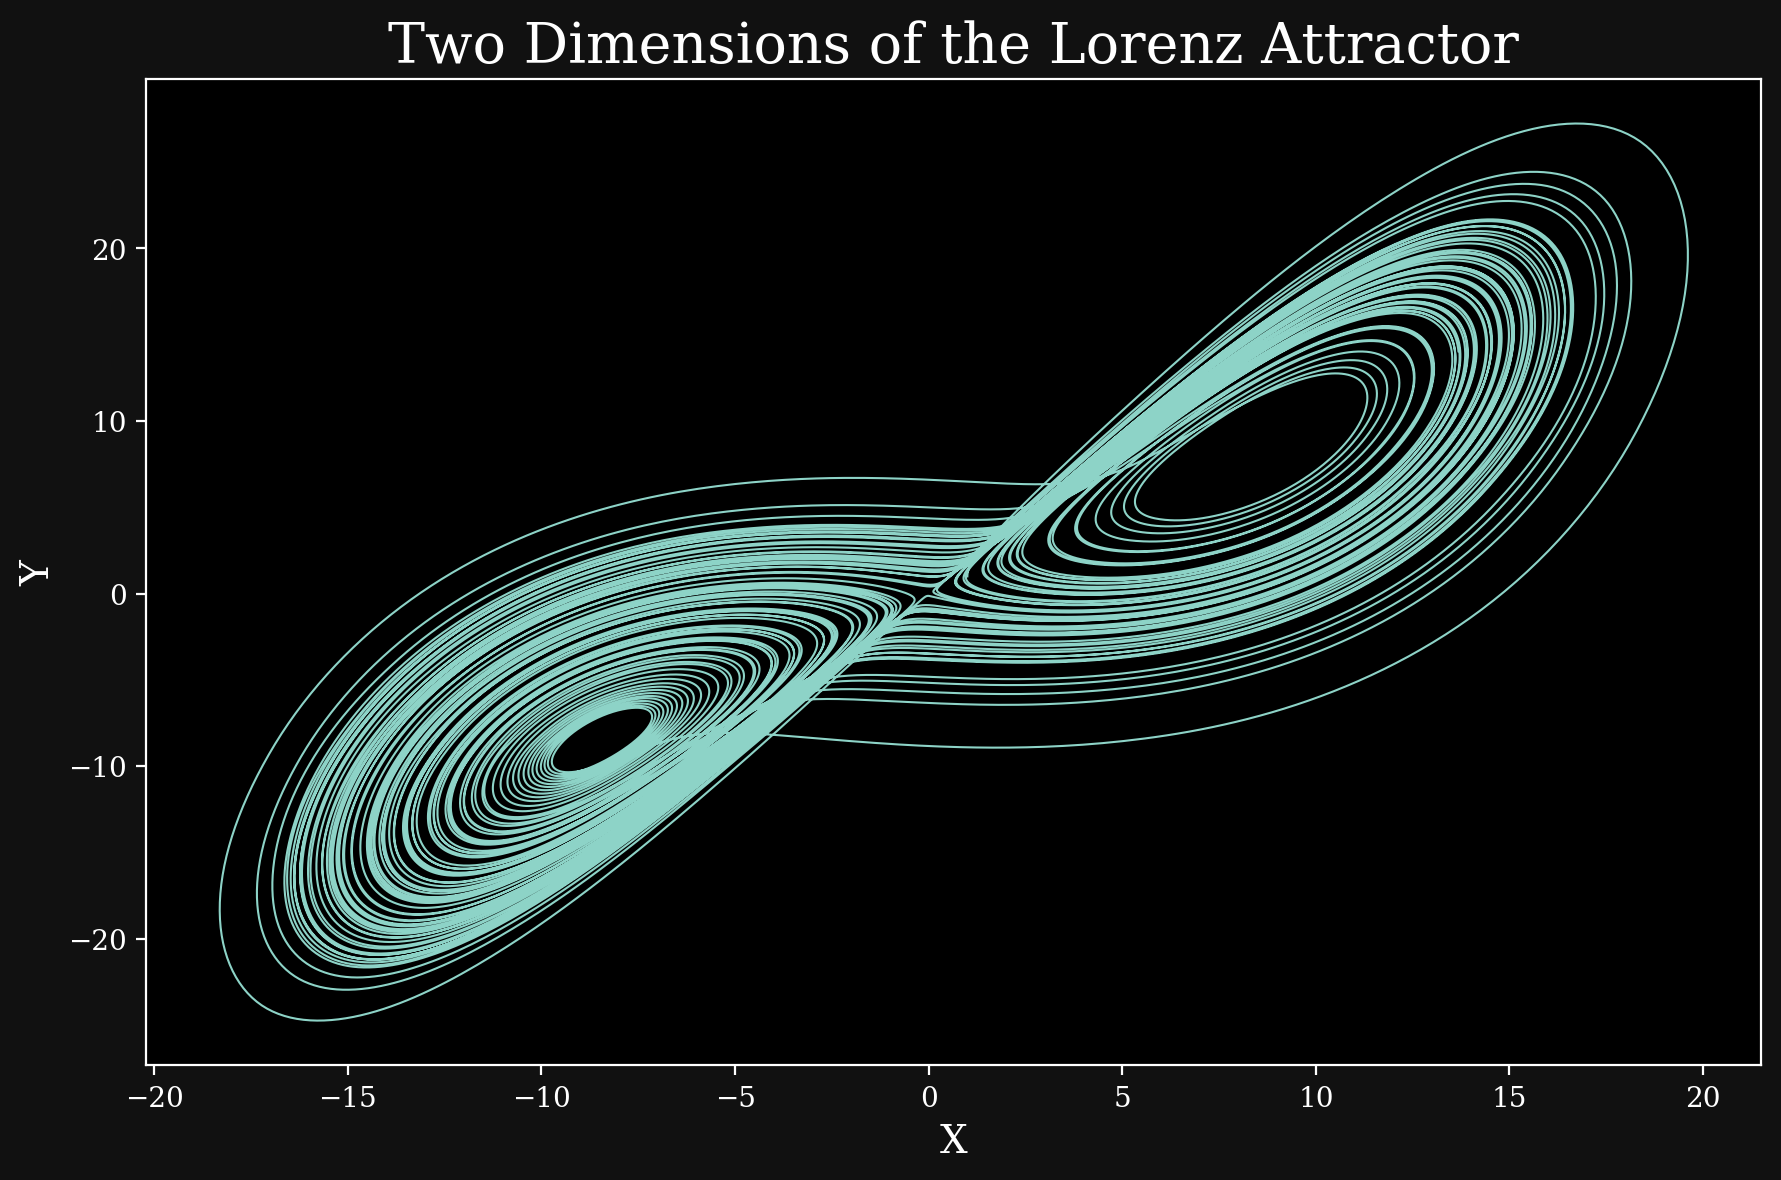

In [5]:
#improved version

plt.figure(figsize=(9,6))#arguments are width and height in inches
plt.plot(lorenz_sol.y[0], lorenz_sol.y[1], linewidth = .75) #make line narrow to show all features. For simple plots they should be thicker.
plt.title('Two Dimensions of the Lorenz Attractor',fontsize=20)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.tight_layout()
plt.savefig('good_plot1.png',dpi=200)
plt.show()

In [58]:
np.random
mean = np.array([4.5,3])
cov = np.array([[9, 5],
                [5, 8]])
vals, vecs = np.linalg.eigh(cov)

In [59]:
pts = np.random.multivariate_normal(mean, cov, size=300)

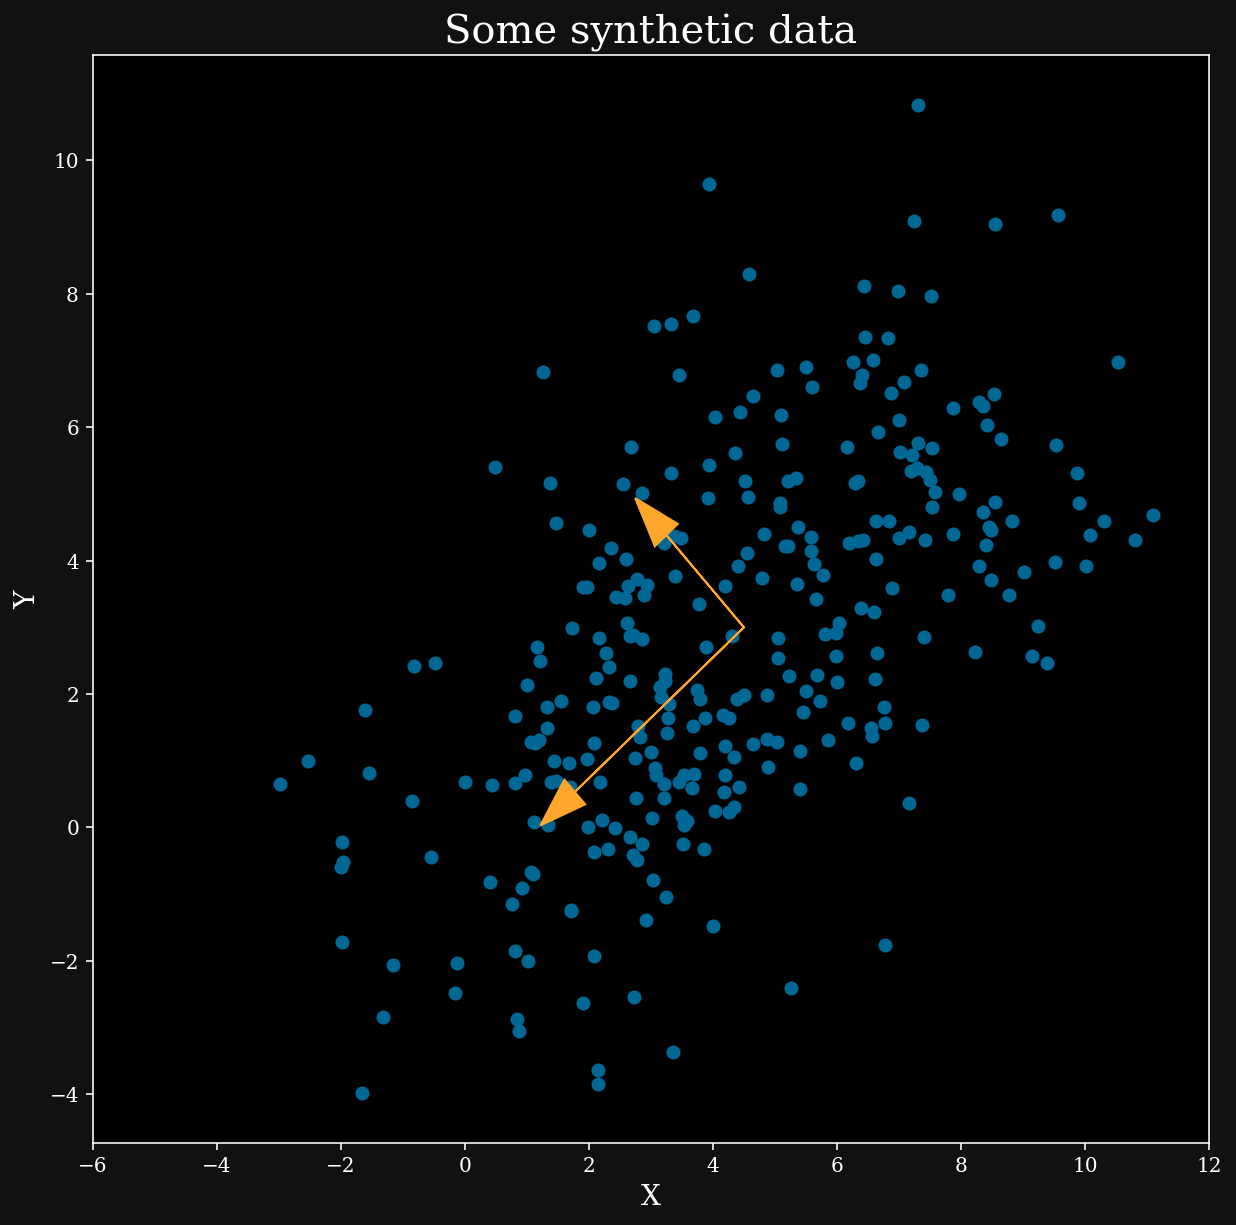

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(pts[:,0],pts[:,1], c='xkcd:peacock blue')
plt.title("Some synthetic data", fontsize=20)
plt.xlim([-5,13])
plt.xlim([-6,12])
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.arrow(mean[0],mean[1],-np.sqrt(vals[0])*vecs[0,0],-np.sqrt(vals[0])*vecs[1,0],
          head_width=0.5,fc='xkcd:mango', ec='xkcd:mango')
plt.arrow(mean[0],mean[1],np.sqrt(vals[1])*vecs[0,1], np.sqrt(vals[1])*vecs[1,1],
          head_width=0.5,fc='xkcd:mango', ec='xkcd:mango')
plt.show()

In [61]:
transformed = pts@(vecs[:,::-1])

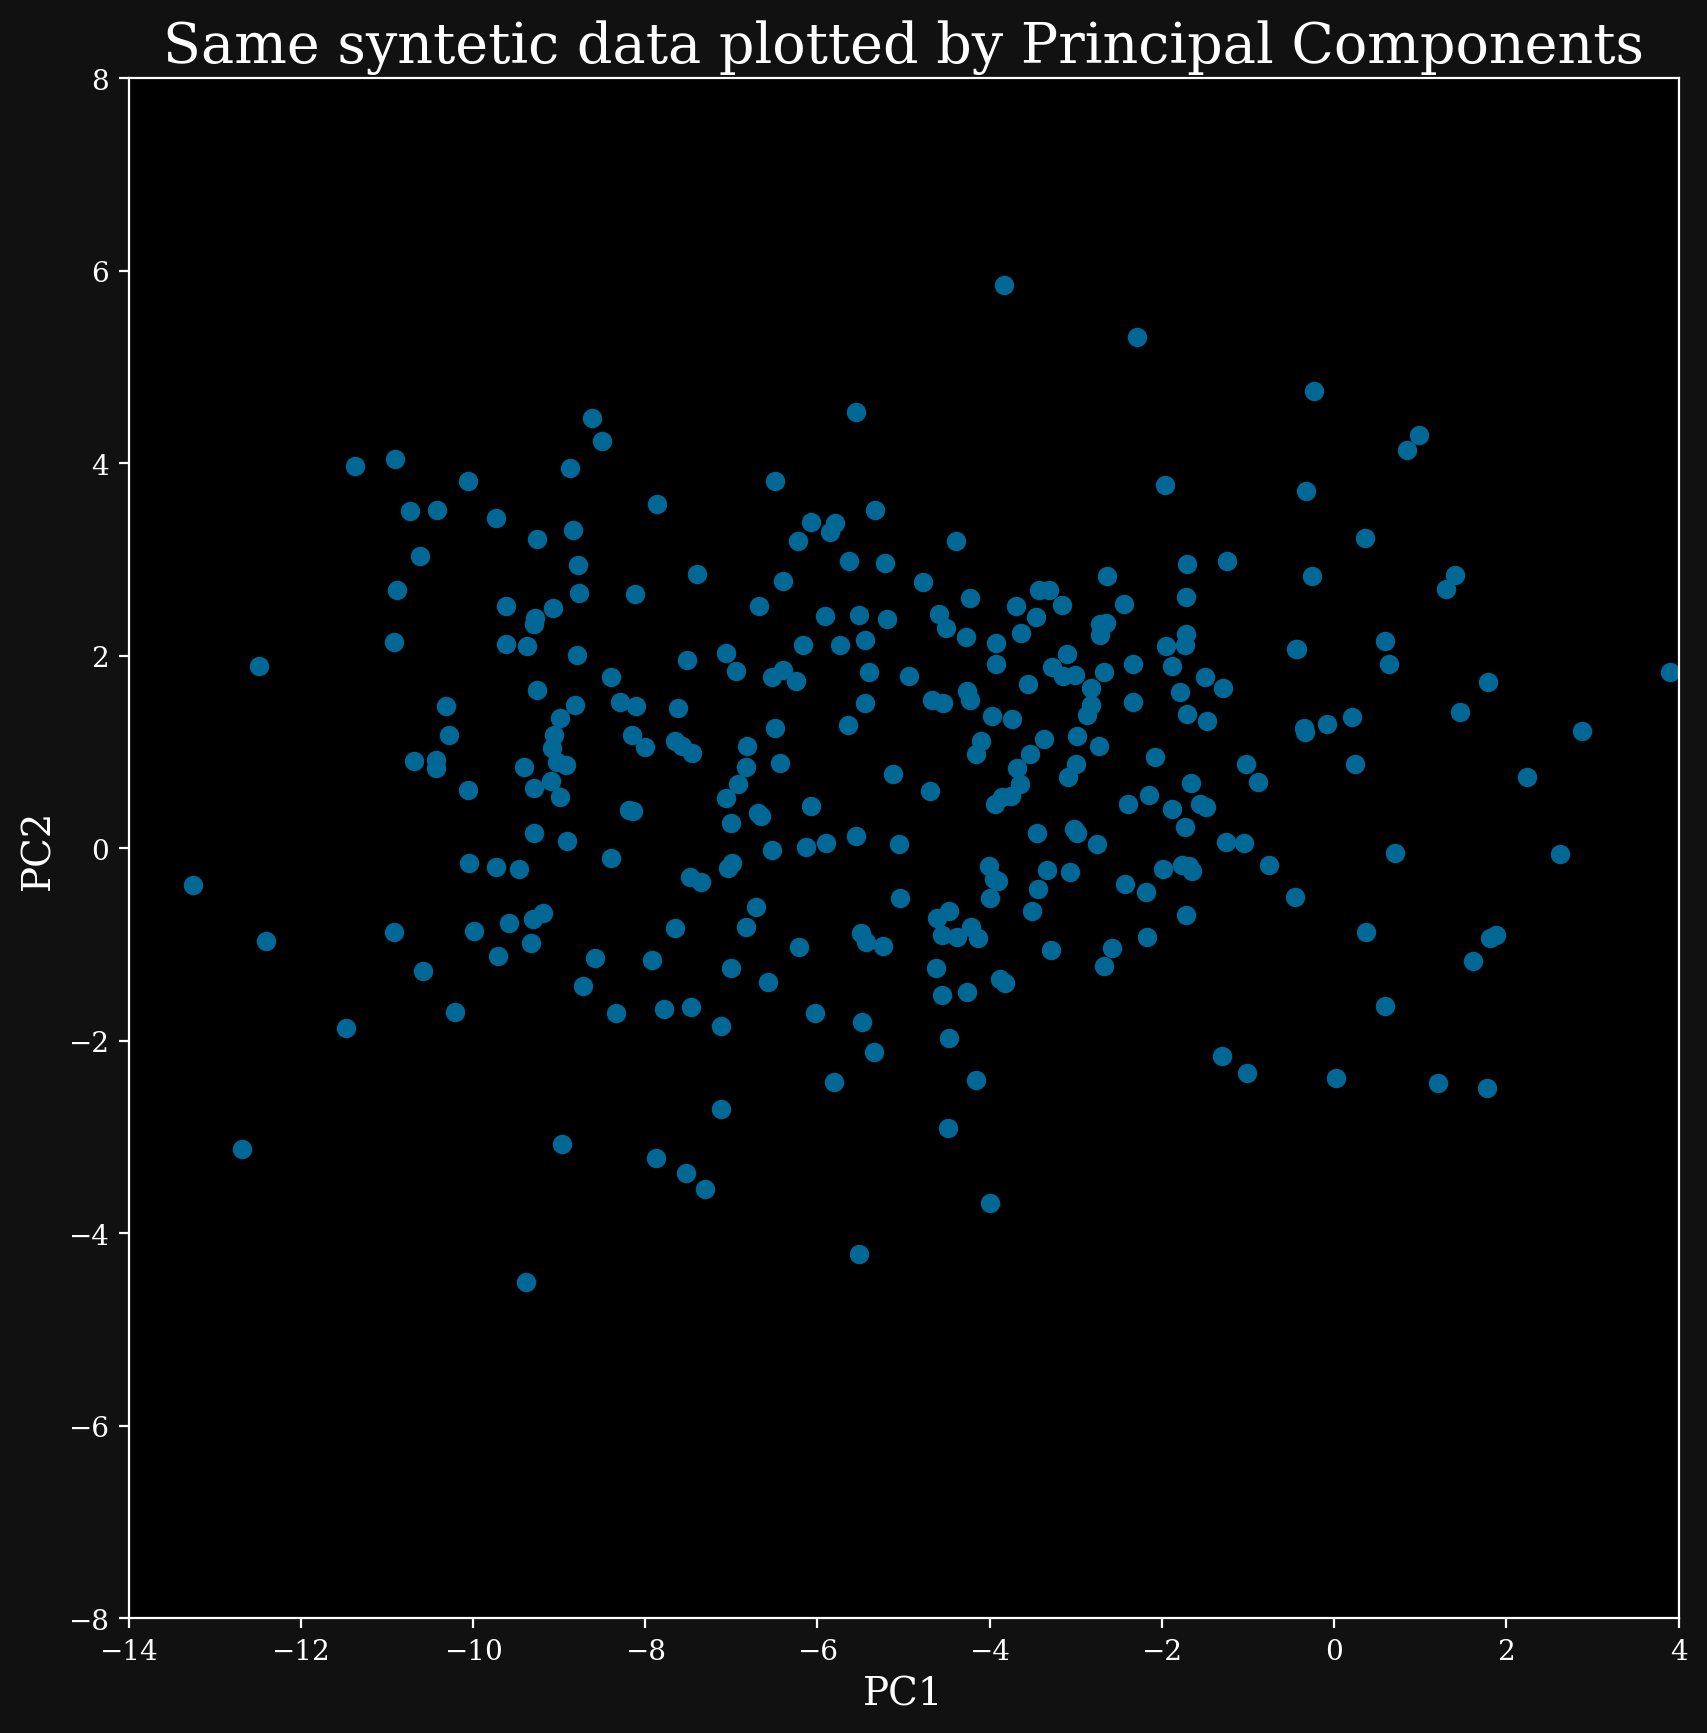

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(transformed[:,0], transformed[:,1],c='xkcd:peacock blue')
plt.title("Same syntetic data plotted by Principal Components", fontsize=20)
plt.ylim([-8,8])
plt.xlim([-14,4])
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.show()

## The Math behind Principal Component Analysis - Variance and Covariance

*This is beyond the scope of this bootcamp but provides some math equations to explain Covariance and PCA*

Many of you have probably taken a statistics class and had to compute the variance or standard deviation of some data. As a refresher, if we have $N$ observations of a random variable $x$ then the variance is

$$\sigma^2 = \frac{1}{N}\sum_{n=1}^{N} (x_n-\mu)^2$$

Where $\mu$ is the mean or average of the $x$ values in the dataset.

The covariance generalizes this concept to the case where one is interested in multiple random variables that may be correlated. If $x$ and $y$ are random variables which we have observed $N$ times then we can say

$$\text{Cov}(x,y) = \frac{1}{N} \sum_{n=1}^{N} (x_n-\mu_x)(y_n -\mu_y).$$

Note the follwing important relations:

$$\text{Cov}(x,x) = \sigma^2_x$$
$$ \text{Cov}(x,y) = \text{Cov}(y,x).$$

In general if there are $M$ random variables lets call them $x^{(i)}$ that may be correlated it is quite convenient to consider a *Covariance matrix* this a matrix $C$ such that 

$$C_{i,j} = \text{Cov}(x^{(i)},x^{(j)}).$$

Note that the two identies discussed above imply that 
1. The diagonal elements of the covariance matrix are the variances of each variable and
1. The covariance matrix is symmetric and
1. For the mathematicians it is also positive definite since variances are always positive. 


The covariance of different variables in a dataset is one of the most important things one can learn about their data and there are lots of ways of using the information in the covariance matrix to analyze and understand the data. 